In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn import utils
import numpy as np
from sklearn import linear_model
from sklearn import svm
from sklearn.linear_model import LinearRegression

from sklearn.svm import SVC
from pandas.plotting import scatter_matrix
import seaborn as sns

%matplotlib inline

In [72]:

data = pd.read_csv("fibre_properties.csv")
data

,Sr.No,2.5% span length (mm),UR (%),Fineness (ug/inch),Bundle Strength (cN/tex),Trash content (%),Yarn Count (tex),Lea strength (kg),CSP,CV% of count,CV% strength,Unevenness (CV),Total imperfections per km
0,1,28.32,49.6,4.18,22.25,5.32,36.91,82.56,2879,1.19,4.08,14.19,347
1,2,27.98,49.6,3.80,21.84,5.60,36.91,83.46,2956,2.15,3.53,13.97,342
2,3,28.53,48.0,4.50,22.17,6.30,36.91,85.73,3011,1.43,4.93,13.88,303
3,4,29.58,50.0,4.24,22.17,5.38,36.91,79.38,2747,2.25,5.47,13.94,178
4,5,29.20,50.5,4.25,22.27,5.30,36.91,76.66,2701,2.40,5.50,14.24,168
5,6,27.67,49.0,4.42,21.71,5.73,36.91,75.30,2643,2.12,4.84,14.46,213
6,7,27.94,48.8,3.90,21.46,5.48,29.53,63.96,2760,1.37,3.92,15.58,484
7,8,28.32,49.6,4.18,22.25,5.32,29.53,68.04,2905,2.00,4.36,14.95,331
8,9,27.98,49.6,3.80,21.84,5.60,29.53,63.50,2844,1.74,4.61,14.69,434
9,10,28.53,48.0,4.50,22.17,6.30,29.53,57.61,2556,2.39,6.00,14.77,390


In [90]:
del data["Sr.No"]

In [91]:
pd.set_option('display.max_columns',None)
data.head()


,2.5% span length (mm),UR (%),Fineness (ug/inch),Bundle Strength (cN/tex),Trash content (%),Yarn Count (tex),Lea strength (kg),CSP,CV% of count,CV% strength,Unevenness (CV),Total imperfections per km
0,28.32,49.6,4.18,22.25,5.32,36.91,82.56,2879,1.19,4.08,14.19,347
1,27.98,49.6,3.80,21.84,5.60,36.91,83.46,2956,2.15,3.53,13.97,342
2,28.53,48.0,4.50,22.17,6.30,36.91,85.73,3011,1.43,4.93,13.88,303
3,29.58,50.0,4.24,22.17,5.38,36.91,79.38,2747,2.25,5.47,13.94,178
4,29.20,50.5,4.25,22.27,5.30,36.91,76.66,2701,2.40,5.50,14.24,168


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   2.5% span length (mm)       20 non-null     float64
 1   UR (%)                      20 non-null     float64
 2   Fineness (ug/inch)          20 non-null     float64
 3   Bundle Strength (cN/tex)    20 non-null     float64
 4   Trash content (%)           20 non-null     float64
 5   Yarn Count (tex)            20 non-null     float64
 6   Lea strength (kg)           20 non-null     float64
 7   CSP                         20 non-null     int64  
 8   CV% of count                20 non-null     float64
 9   CV% strength                20 non-null     float64
 10  Unevenness (CV)             20 non-null     float64
 11  Total imperfections per km  20 non-null     int64  
dtypes: float64(10), int64(2)
memory usage: 2.0 KB


In [93]:
data["Yarn Count (tex)"].value_counts()
            

28.80    8
36.91    6
29.53    6
Name: Yarn Count (tex), dtype: int64

In [94]:
data.isnull().sum()

2.5% span length (mm)         0
UR (%)                        0
Fineness (ug/inch)            0
Bundle Strength (cN/tex)      0
Trash content (%)             0
Yarn Count (tex)              0
Lea strength (kg)             0
CSP                           0
CV% of count                  0
CV% strength                  0
Unevenness (CV)               0
Total imperfections per km    0
dtype: int64

In [95]:
data.describe()

,2.5% span length (mm),UR (%),Fineness (ug/inch),Bundle Strength (cN/tex),Trash content (%),Yarn Count (tex),Lea strength (kg),CSP,CV% of count,CV% strength,Unevenness (CV),Total imperfections per km
count,20.000000,20.000000,20.0000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,26.890500,48.425000,4.6620,19.158000,8.999000,31.452000,59.693500,2409.350000,1.965000,4.704000,15.988500,491.350000
std,1.972688,1.418626,0.6016,3.329488,4.247461,3.679015,16.365092,454.599682,0.385248,0.619545,1.862334,222.123549
min,22.400000,45.500000,3.8000,14.650000,5.300000,28.800000,41.730000,1829.000000,1.190000,3.530000,13.880000,168.000000
25%,25.350000,47.875000,4.2250,15.360000,5.510000,28.800000,43.090000,1918.250000,1.800000,4.235000,14.405000,339.250000
50%,27.805000,48.400000,4.4700,21.095000,6.015000,29.530000,58.060000,2571.500000,2.015000,4.635000,14.960000,412.000000
75%,28.320000,49.600000,5.2875,22.170000,13.952500,36.910000,75.640000,2781.000000,2.275000,5.175000,17.942500,741.250000
max,29.580000,50.500000,5.5000,22.270000,14.400000,36.910000,85.730000,3011.000000,2.460000,6.000000,18.790000,765.000000


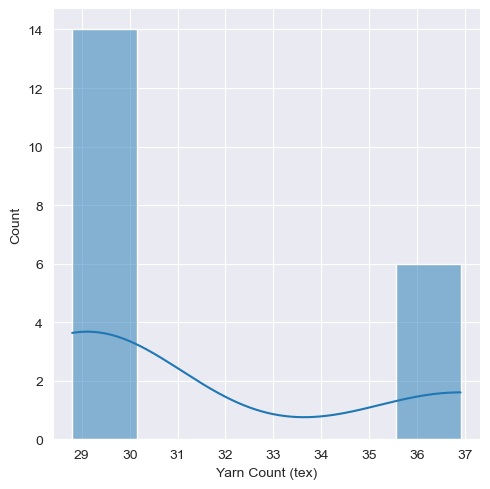

In [96]:
sns.displot(data['Yarn Count (tex)'],kde=True)

In [97]:
data.head()

,2.5% span length (mm),UR (%),Fineness (ug/inch),Bundle Strength (cN/tex),Trash content (%),Yarn Count (tex),Lea strength (kg),CSP,CV% of count,CV% strength,Unevenness (CV),Total imperfections per km
0,28.32,49.6,4.18,22.25,5.32,36.91,82.56,2879,1.19,4.08,14.19,347
1,27.98,49.6,3.80,21.84,5.60,36.91,83.46,2956,2.15,3.53,13.97,342
2,28.53,48.0,4.50,22.17,6.30,36.91,85.73,3011,1.43,4.93,13.88,303
3,29.58,50.0,4.24,22.17,5.38,36.91,79.38,2747,2.25,5.47,13.94,178
4,29.20,50.5,4.25,22.27,5.30,36.91,76.66,2701,2.40,5.50,14.24,168


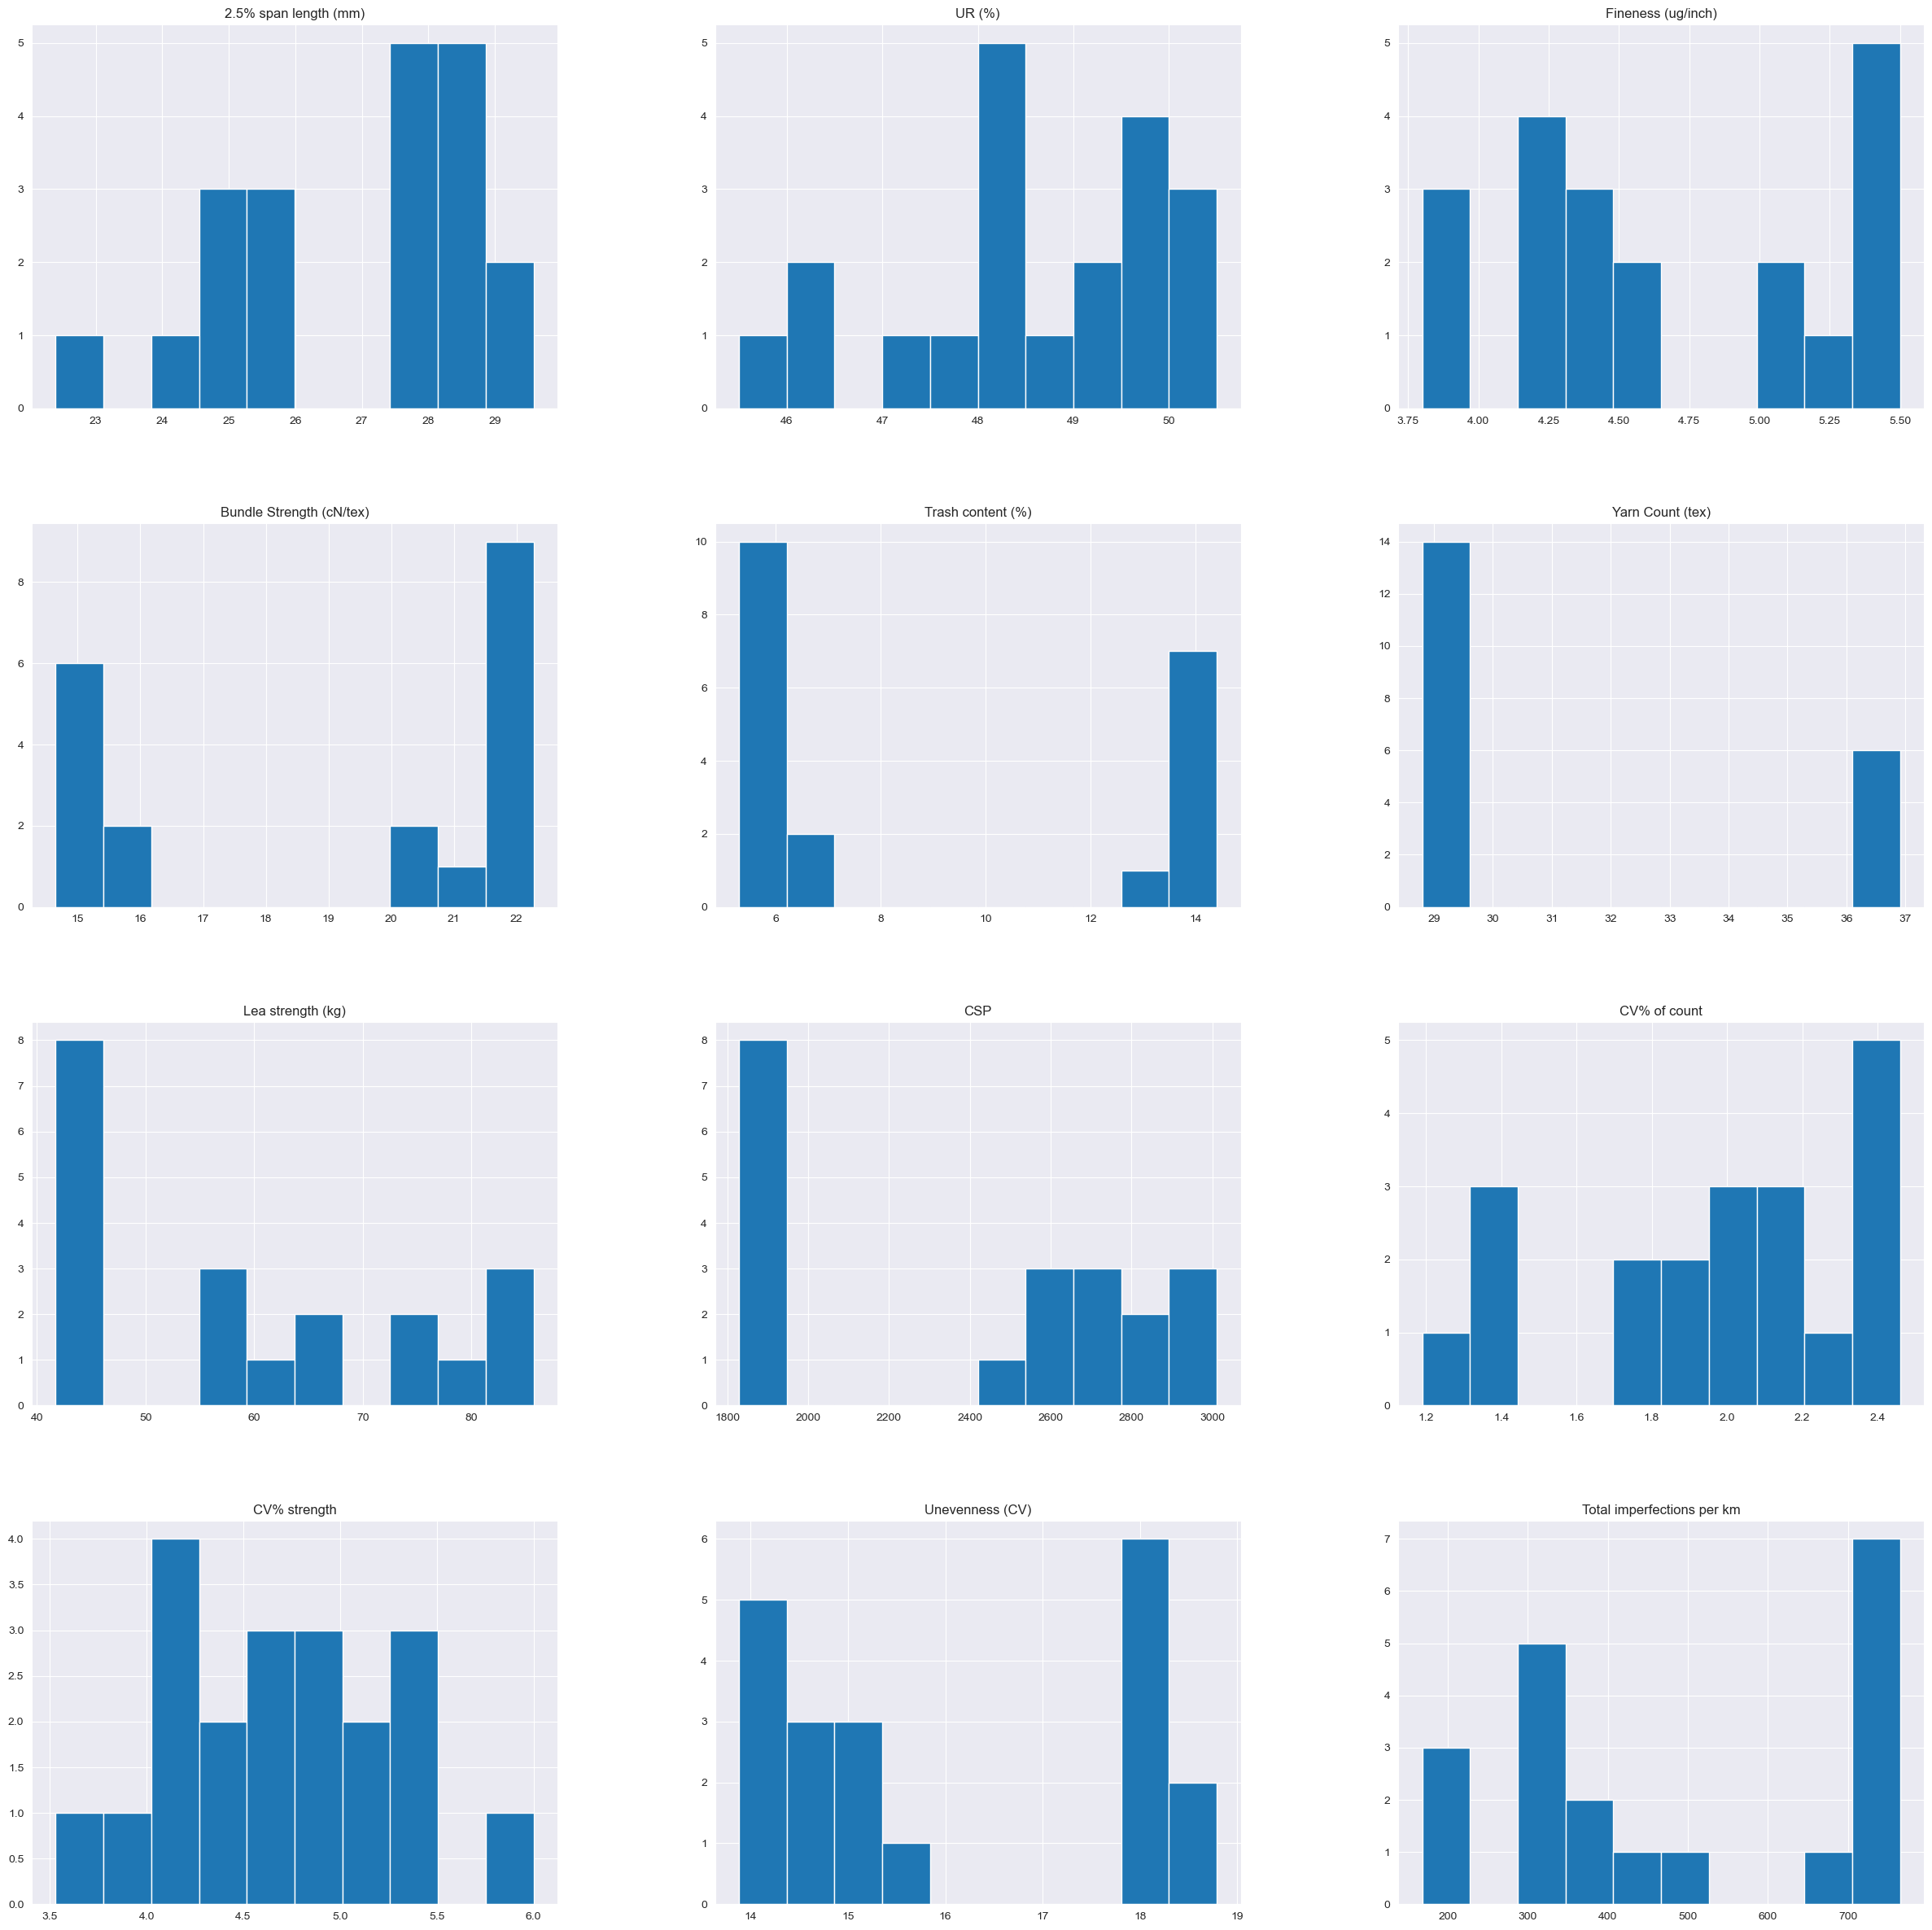

In [98]:
sns.set_style('darkgrid')
data.hist(figsize=(30,30))
plt.show()

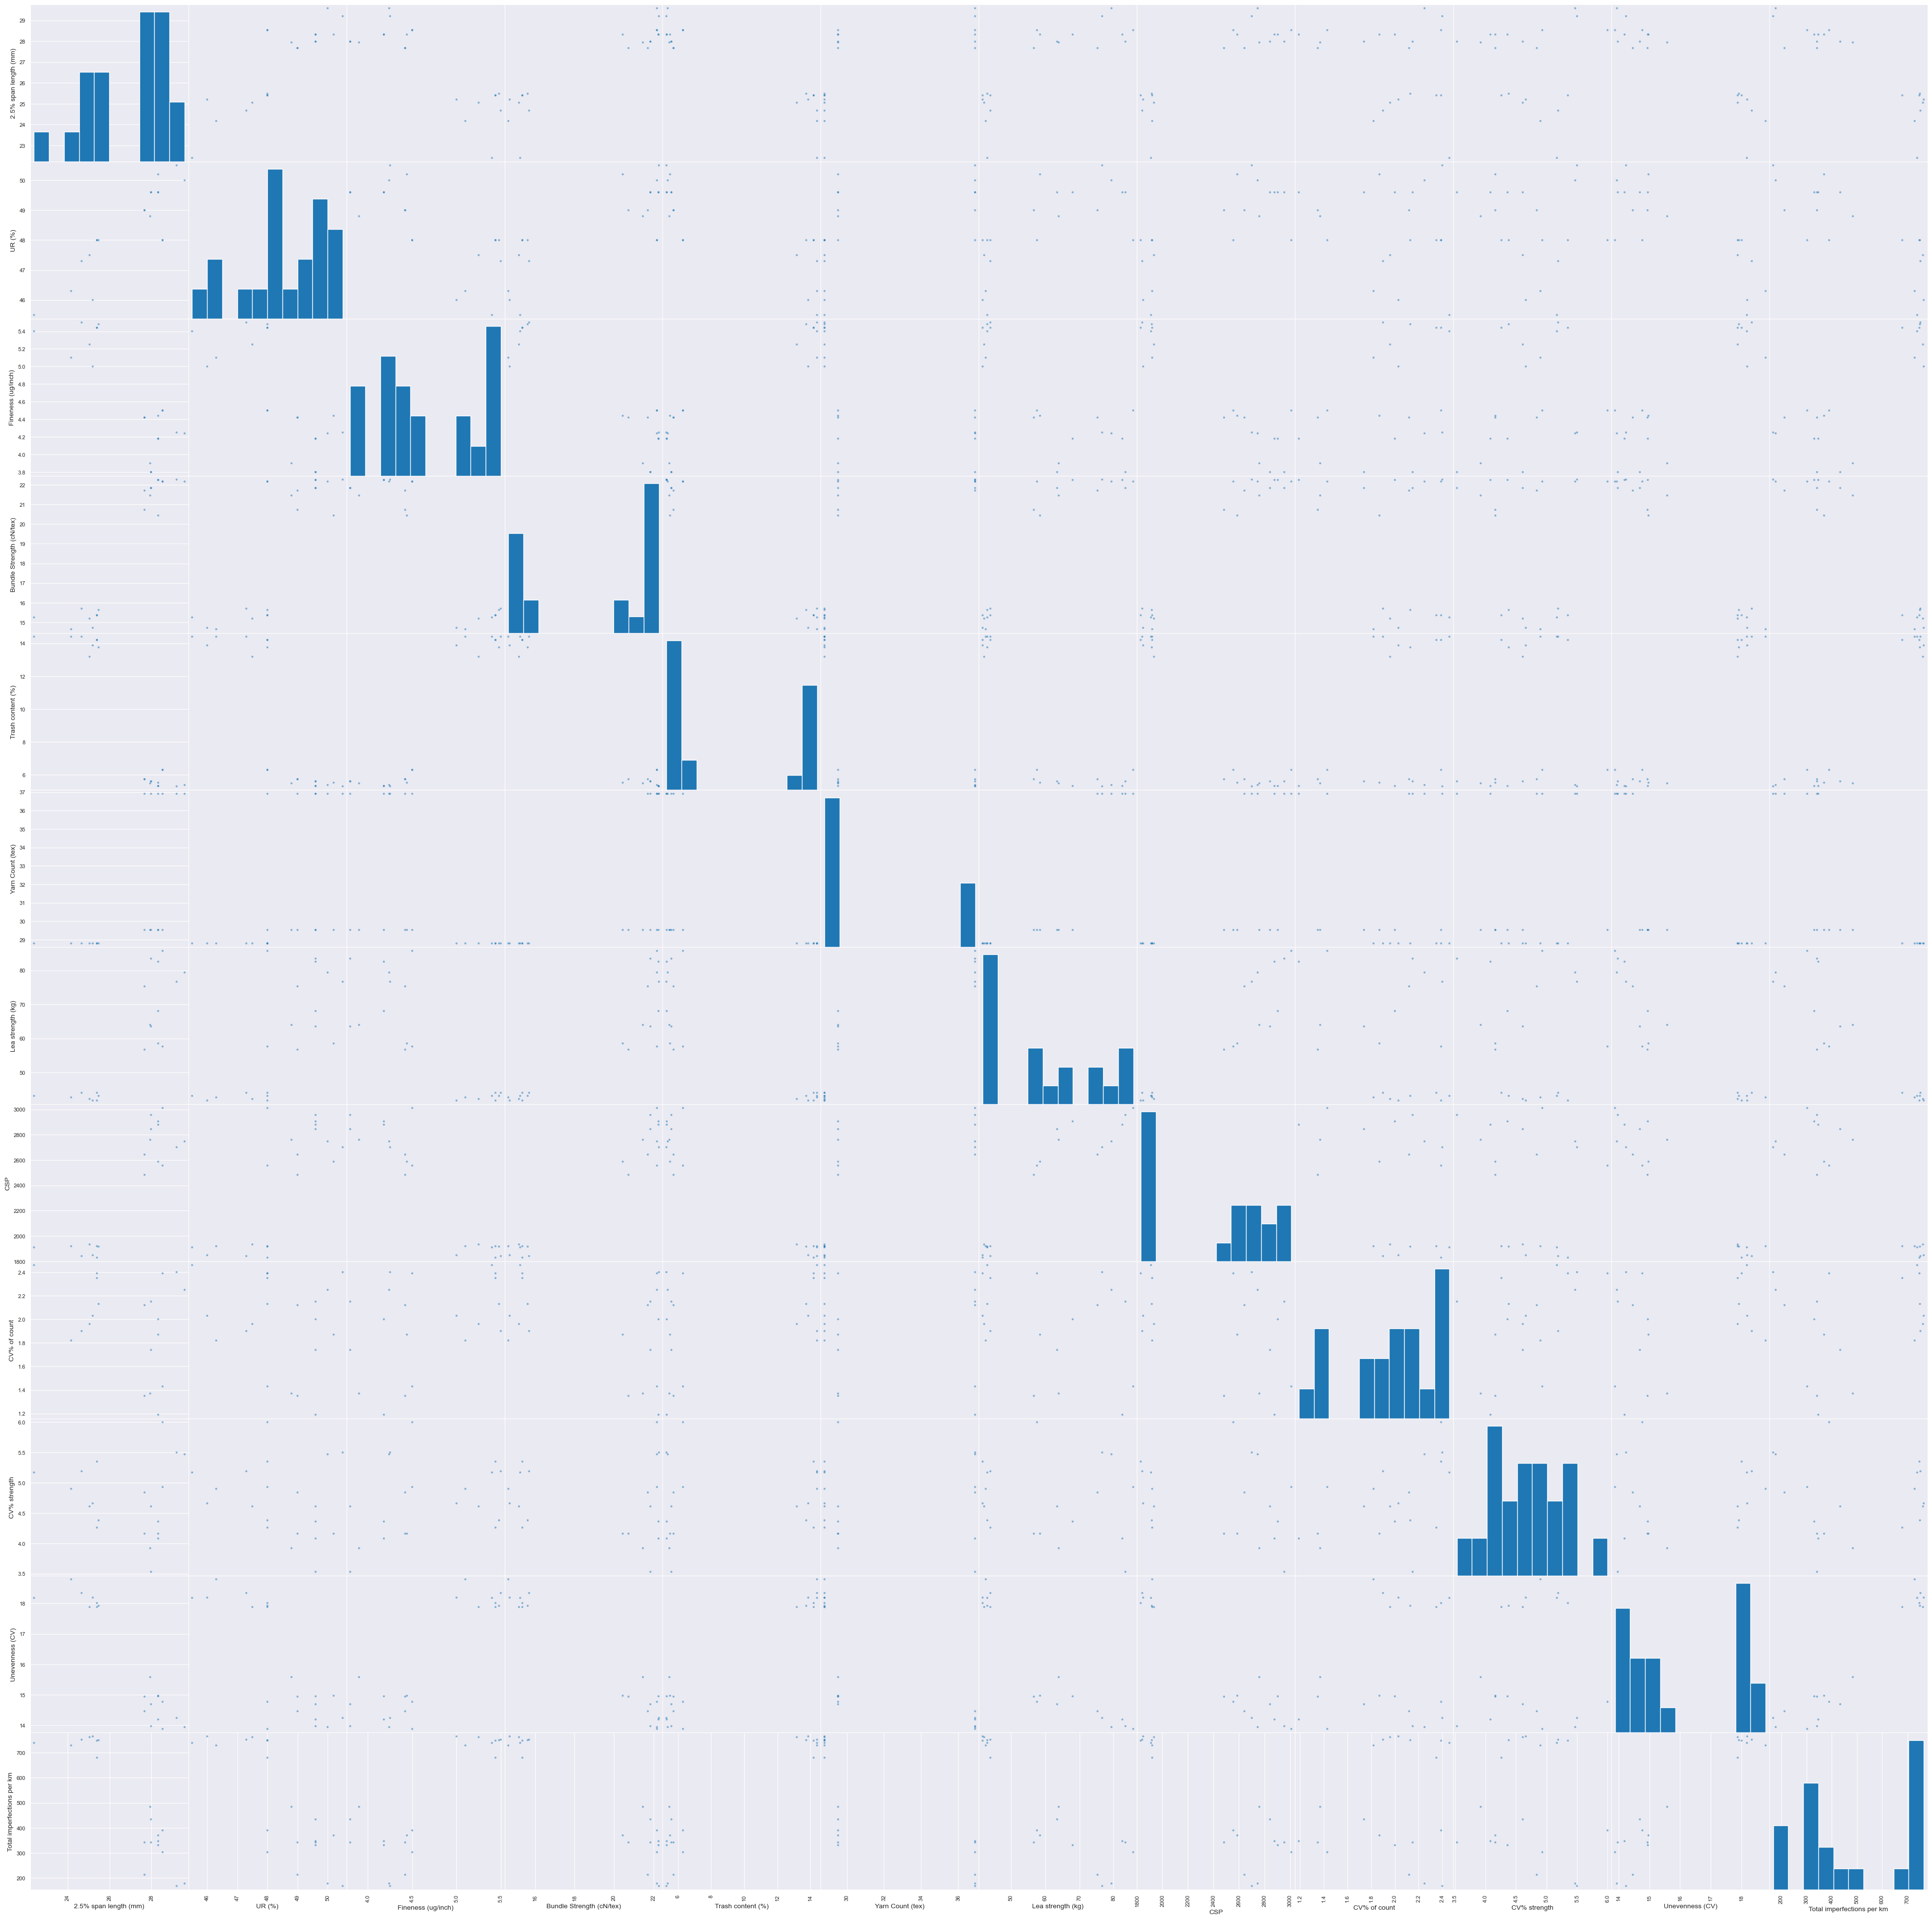

In [99]:
# Create scatter plot matrix
scatter_matrix(data, figsize = (50,50))
plt.show()

<AxesSubplot:>

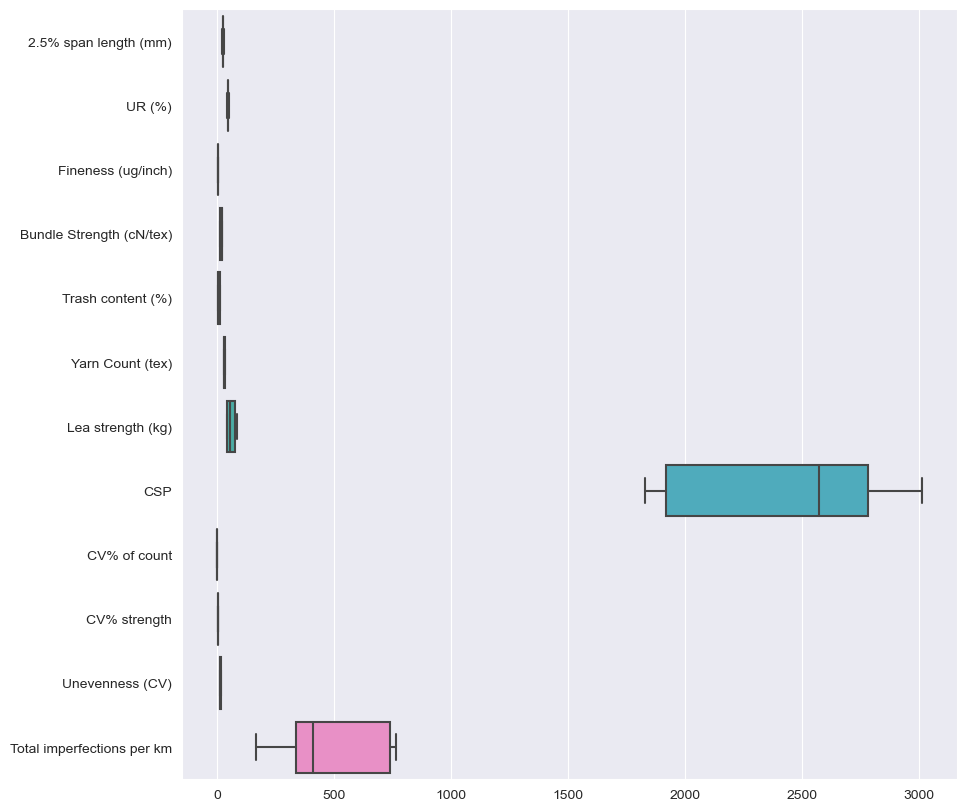

In [100]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data,orient='h')

In [101]:

data.corr()

,2.5% span length (mm),UR (%),Fineness (ug/inch),Bundle Strength (cN/tex),Trash content (%),Yarn Count (tex),Lea strength (kg),CSP,CV% of count,CV% strength,Unevenness (CV),Total imperfections per km
2.5% span length (mm),1.000000,0.873845,-0.836474,0.928792,-0.928949,0.623695,0.832540,0.884730,-0.266917,-0.068538,-0.931325,-0.908841
UR (%),0.873845,1.000000,-0.734053,0.799854,-0.824903,0.537202,0.715112,0.762111,-0.174163,-0.238994,-0.810708,-0.808752
Fineness (ug/inch),-0.836474,-0.734053,1.000000,-0.907985,0.933666,-0.545374,-0.818146,-0.931824,0.392140,0.301871,0.883491,0.822544
Bundle Strength (cN/tex),0.928792,0.799854,-0.907985,1.000000,-0.983654,0.652219,0.898116,0.968696,-0.310223,-0.088707,-0.979293,-0.944334
Trash content (%),-0.928949,-0.824903,0.933666,-0.983654,1.000000,-0.605532,-0.863589,-0.957215,0.362642,0.182732,0.970136,0.938315
Yarn Count (tex),0.623695,0.537202,-0.545374,0.652219,-0.605532,1.000000,0.892170,0.671732,-0.104295,0.006503,-0.734741,-0.757814
Lea strength (kg),0.832540,0.715112,-0.818146,0.898116,-0.863589,0.892170,1.000000,0.930302,-0.301376,-0.145908,-0.929288,-0.902258
CSP,0.884730,0.762111,-0.931824,0.968696,-0.957215,0.671732,0.930302,1.000000,-0.392009,-0.232114,-0.959209,-0.897666
CV% of count,-0.266917,-0.174163,0.392140,-0.310223,0.362642,-0.104295,-0.301376,-0.392009,1.000000,0.520895,0.282807,0.181978
CV% strength,-0.068538,-0.238994,0.301871,-0.088707,0.182732,0.006503,-0.145908,-0.232114,0.520895,1.000000,0.112681,0.007348


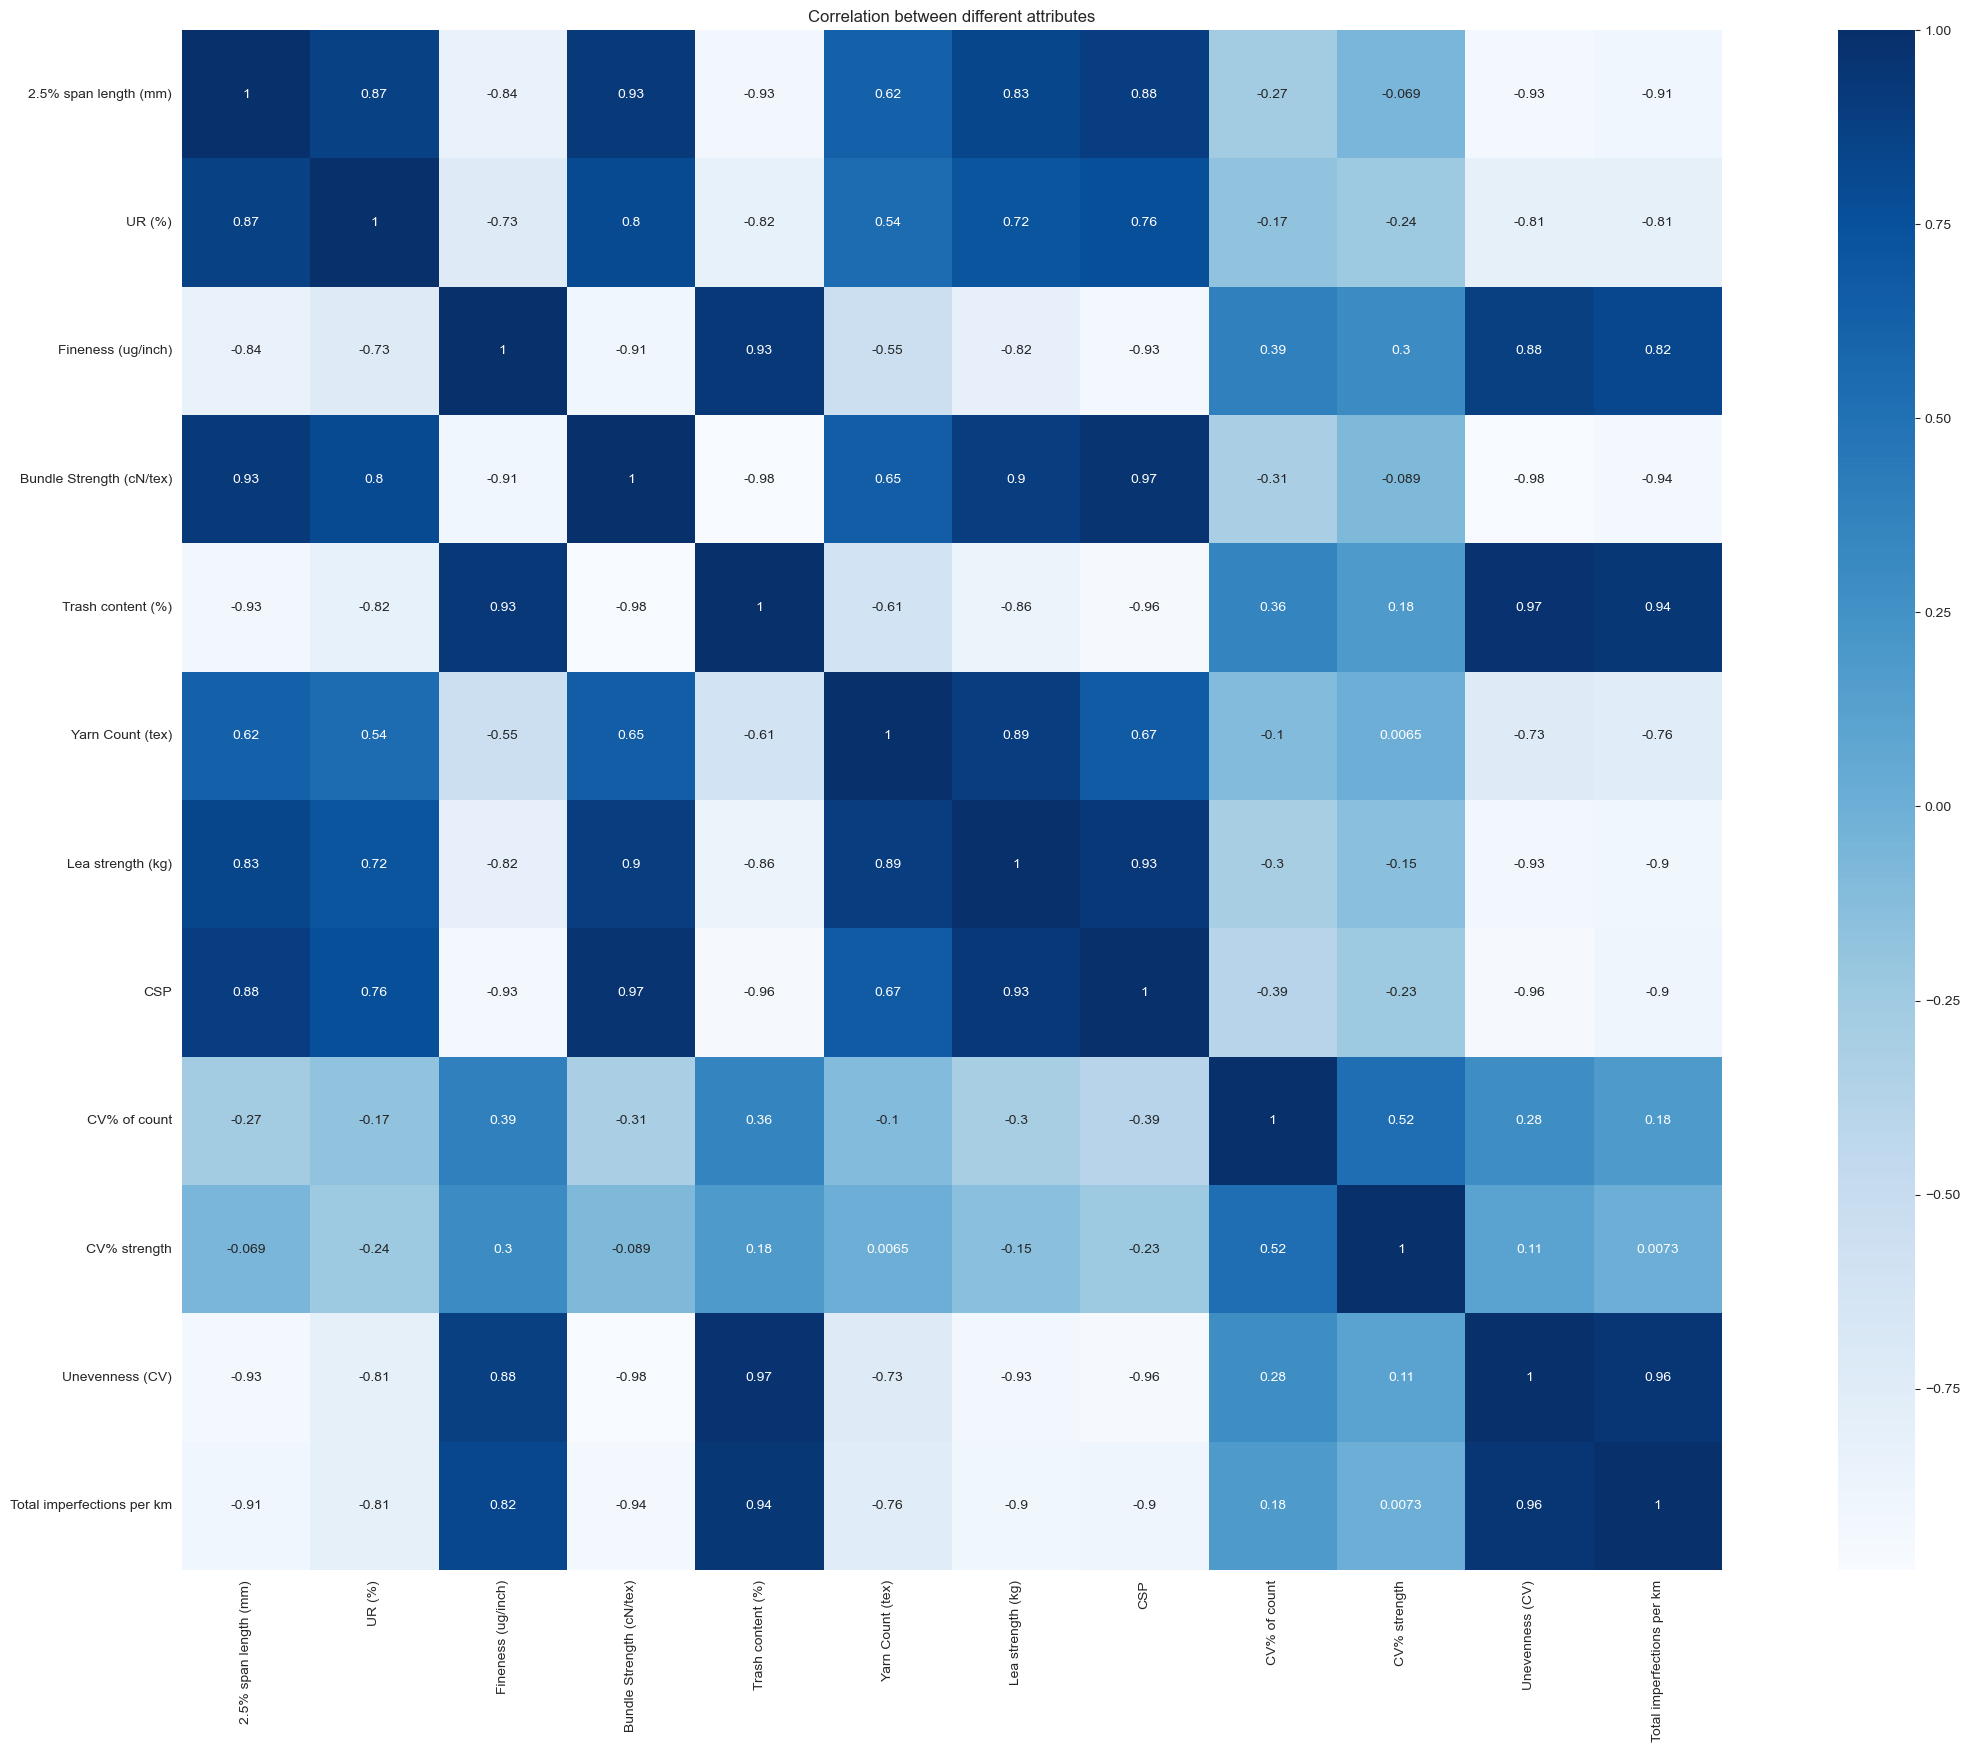

In [102]:
plt.figure(figsize=(30,20))
cor = data.corr()
sns.heatmap(cor,vmax=1,square = True,annot=True, cmap=plt.cm.Blues)
plt.title('Correlation between different attributes')
plt.show()

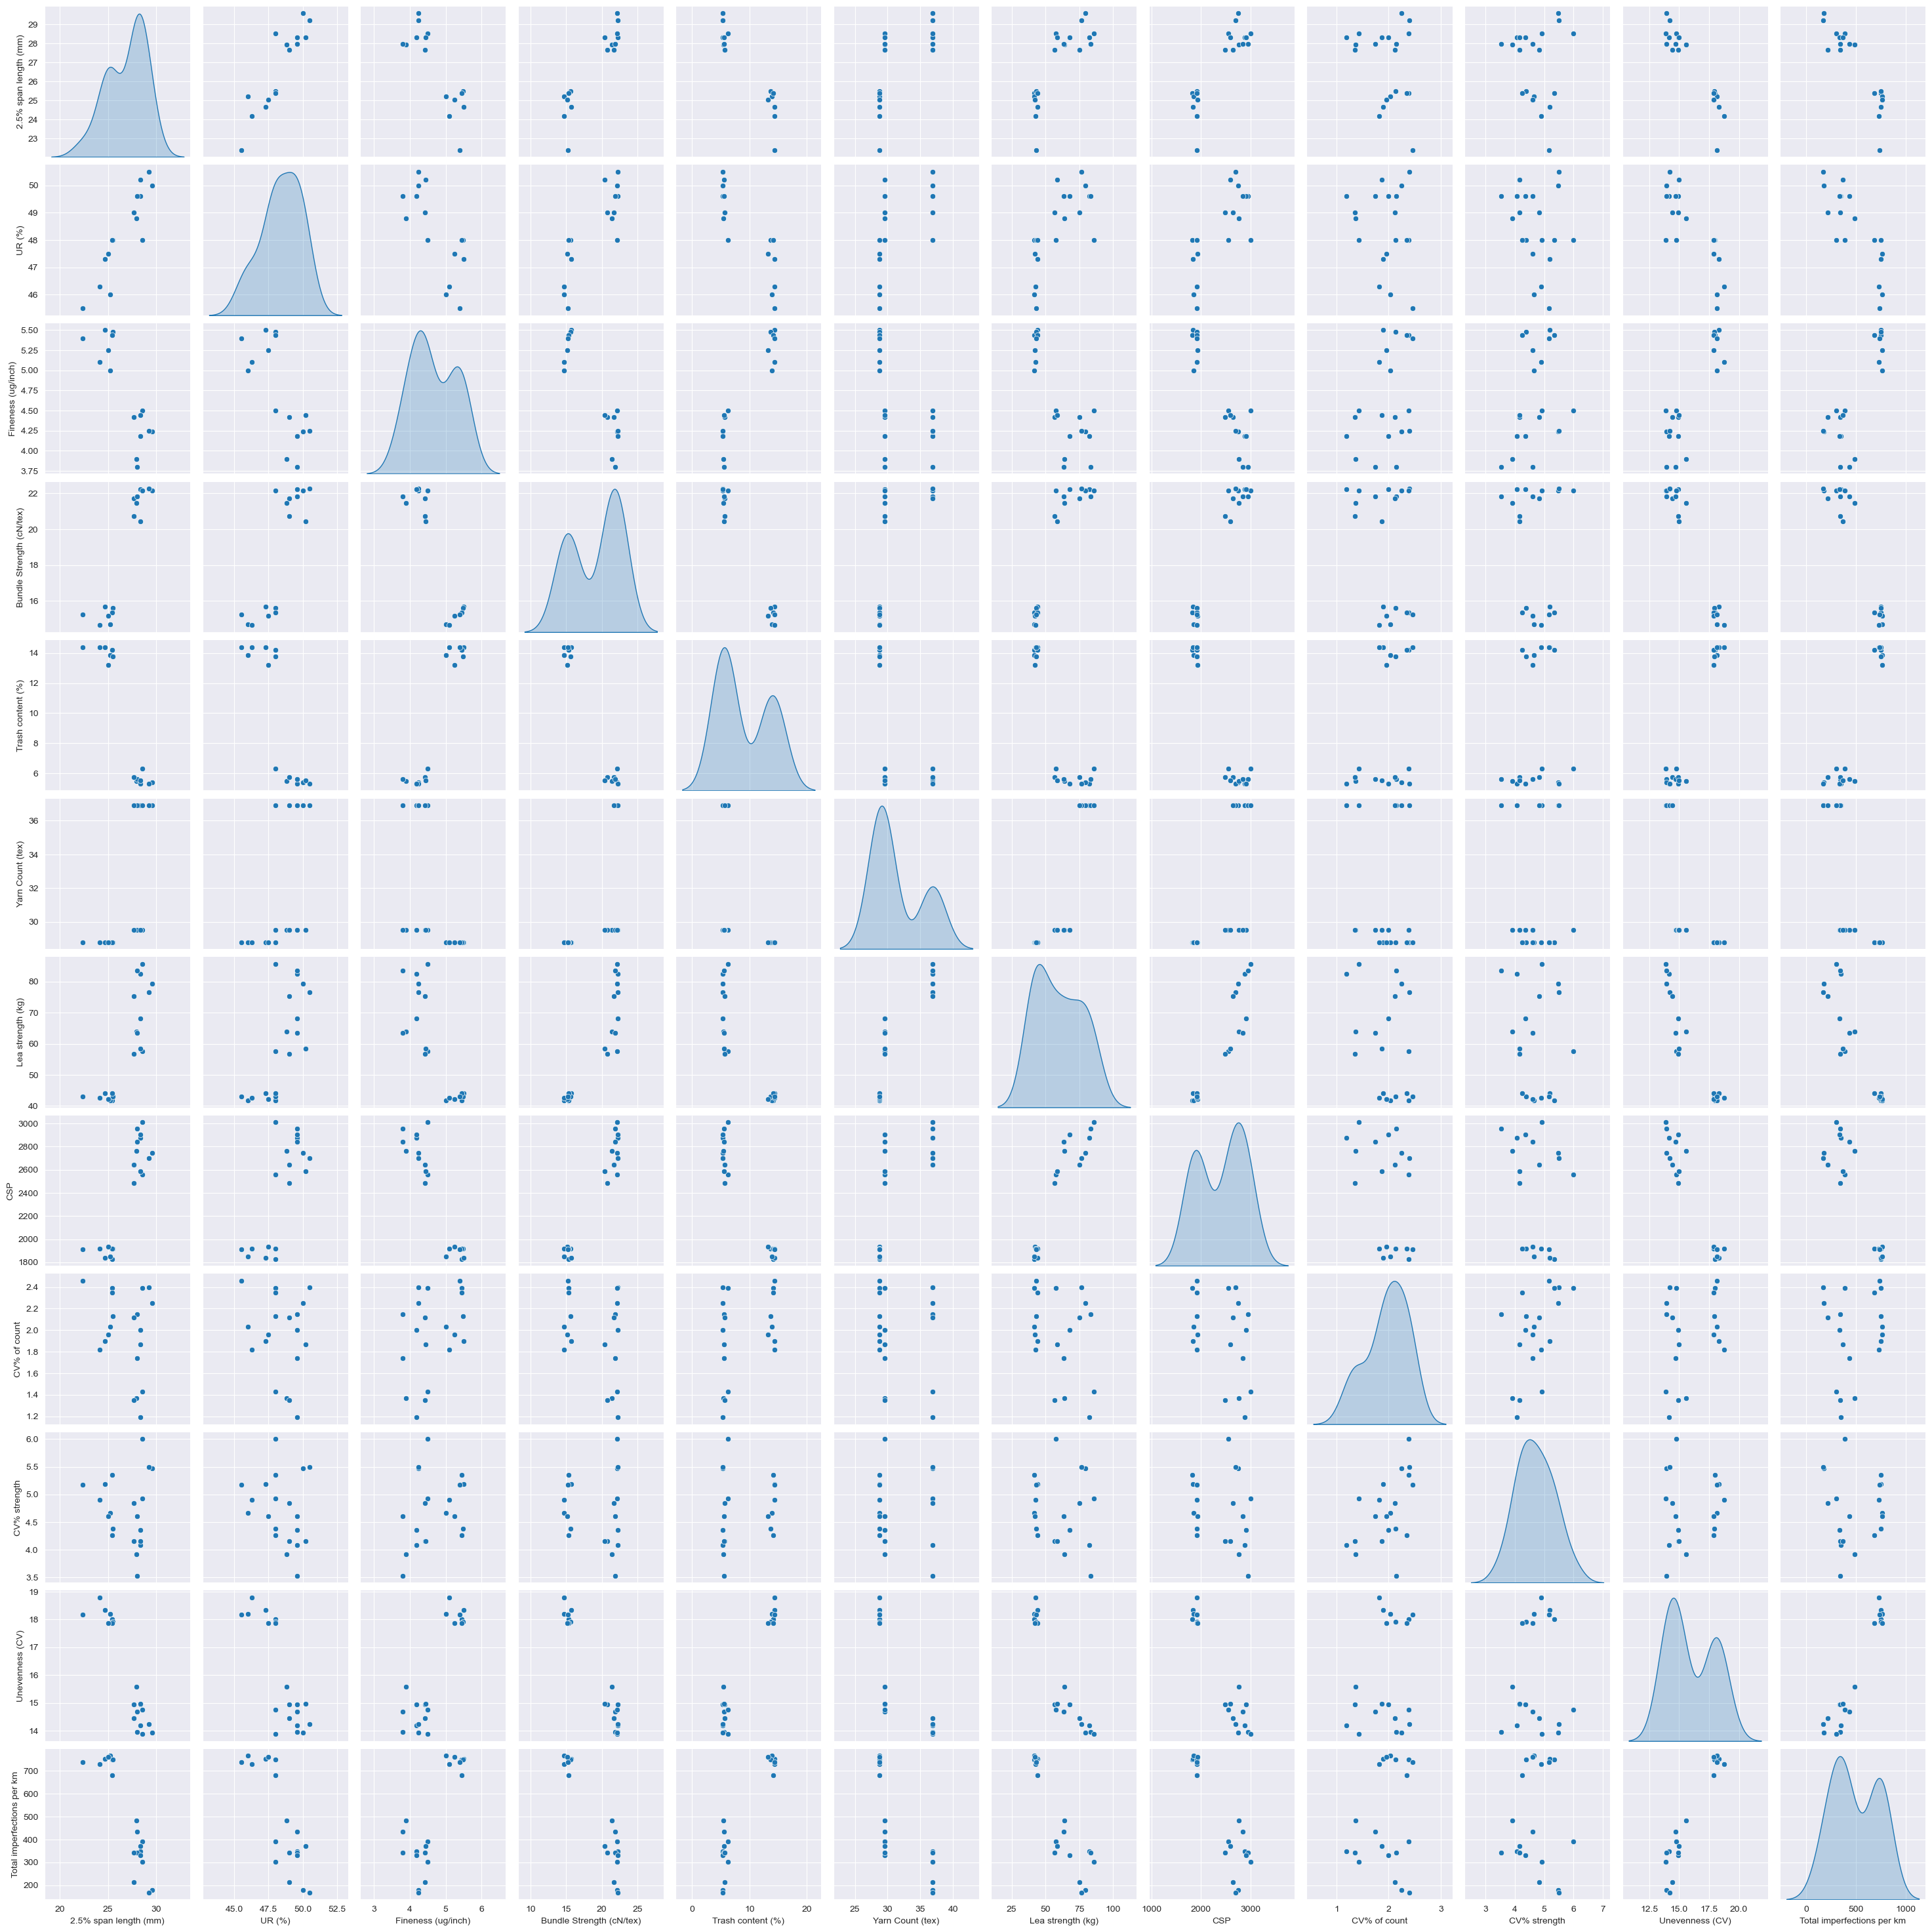

In [103]:
sns.pairplot(data,diag_kind='kde')


In [104]:
#Correlation with output variable
cor_target = abs(cor["Yarn Count (tex)"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0]
relevant_features

2.5% span length (mm)         0.623695
UR (%)                        0.537202
Fineness (ug/inch)            0.545374
Bundle Strength (cN/tex)      0.652219
Trash content (%)             0.605532
Yarn Count (tex)              1.000000
Lea strength (kg)             0.892170
CSP                           0.671732
CV% of count                  0.104295
CV% strength                  0.006503
Unevenness (CV)               0.734741
Total imperfections per km    0.757814
Name: Yarn Count (tex), dtype: float64

In [34]:
data.head()

,Sr.No,2.5% span length (mm),UR (%),Fineness (ug/inch),Bundle Strength (cN/tex),Trash content (%),Yarn Count (tex),Lea strength (kg),CSP,CV% of count,CV% strength,Unevenness (CV),Total imperfections per km
0,1,28.32,49.6,4.18,22.25,5.32,36.91,82.56,2879,1.19,4.08,14.19,347
1,2,27.98,49.6,3.80,21.84,5.60,36.91,83.46,2956,2.15,3.53,13.97,342
2,3,28.53,48.0,4.50,22.17,6.30,36.91,85.73,3011,1.43,4.93,13.88,303
3,4,29.58,50.0,4.24,22.17,5.38,36.91,79.38,2747,2.25,5.47,13.94,178
4,5,29.20,50.5,4.25,22.27,5.30,36.91,76.66,2701,2.40,5.50,14.24,168


In [75]:
#Split the data into predictor variables and target variable, following by breaking them into train and test sets. 
from sklearn import preprocessing
from sklearn import utils


data = pd.read_csv("fibre_properties.csv")
del data["Sr.No"]
X = data.iloc[:,0:6].values
Y = data[["Lea strength (kg)","CSP","CV% of count","CV% strength","Unevenness (CV)","Total imperfections per km"]].values

#Y = data.iloc[:,6:12].values
#Y = data.drop(['2.5% span length (mm)','UR (%)','Fineness (ug/inch)','Bundle Strength (cN/tex)','Trash content (%)','Yarn Count (tex)'],axis=1).values
#pd.options.display.float_format='{:.5f}'.format
t=preprocessing.LabelEncoder()

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.30, random_state=21)


In [76]:
X_train,Y_train

(array([[24.17, 46.3 ,  5.1 , 14.65, 14.4 , 28.8 ],
        [28.32, 50.2 ,  4.44, 20.44,  5.52, 29.53],
        [27.94, 48.8 ,  3.9 , 21.46,  5.48, 29.53],
        [25.2 , 46.  ,  5.  , 14.72, 13.87, 28.8 ],
        [27.98, 49.6 ,  3.8 , 21.84,  5.6 , 36.91],
        [28.53, 48.  ,  4.5 , 22.17,  6.3 , 36.91],
        [25.4 , 48.  ,  5.44, 15.36, 14.2 , 28.8 ],
        [29.58, 50.  ,  4.24, 22.17,  5.38, 36.91],
        [27.98, 49.6 ,  3.8 , 21.84,  5.6 , 29.53],
        [28.32, 49.6 ,  4.18, 22.25,  5.32, 36.91],
        [25.4 , 48.  ,  5.44, 15.36, 14.2 , 28.8 ],
        [29.2 , 50.5 ,  4.25, 22.27,  5.3 , 36.91],
        [25.48, 48.  ,  5.48, 15.63, 13.75, 28.8 ],
        [28.53, 48.  ,  4.5 , 22.17,  6.3 , 29.53]]),
 array([[4.264e+01, 1.919e+03, 1.820e+00, 4.900e+00, 1.879e+01, 7.290e+02],
        [5.851e+01, 2.587e+03, 1.870e+00, 4.160e+00, 1.497e+01, 3.700e+02],
        [6.396e+01, 2.760e+03, 1.370e+00, 3.920e+00, 1.558e+01, 4.840e+02],
        [4.173e+01, 1.848e+03, 2.030e+00, 

In [66]:
classifiers = [linear_model.LinearRegression()]

predictionData=np.array([28.53, 48.  ,  4.5 , 22.17,  6.3 , 29.53])

for item in classifiers:
    print(item)
    data = item
    
    data.fit(X_train, Y_train)
    print(data.predict(predictionData.reshape(1,-1)),'\n')


LinearRegression()
[[6.08227020e+01 2.66991482e+03 1.95948924e+00 5.72222510e+00
  1.47808928e+01 4.12406820e+02]] 



In [67]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X,Y)

LinearRegression()

In [68]:
import pickle
data = {"model":regressor,"x":X}
with open('model.pkl', 'wb') as file:
    pickle.dump(data, file)
    
with open('model.pkl', 'rb') as file:
    data = pickle.load(file)


In [69]:
regressor_loaded = data["model"]
regressor_loaded.predict(X)

array([[8.12195903e+01, 2.85680257e+03, 1.91746029e+00, 4.58927933e+00,
        1.40479595e+01, 2.50348611e+02],
       [8.26089221e+01, 2.92522507e+03, 1.85641128e+00, 4.09011181e+00,
        1.43393575e+01, 3.17411938e+02],
       [7.98136913e+01, 2.77362714e+03, 1.92594416e+00, 5.51143652e+00,
        1.41394090e+01, 2.64379785e+02],
       [8.01971231e+01, 2.80791031e+03, 1.95643222e+00, 4.83836025e+00,
        1.39659145e+01, 2.38125471e+02],
       [8.05971428e+01, 2.82314004e+03, 2.02429713e+00, 4.65277101e+00,
        1.39660939e+01, 2.32508098e+02],
       [7.86501280e+01, 2.75013779e+03, 1.85957310e+00, 4.66872437e+00,
        1.42181246e+01, 2.47438657e+02],
       [6.29950618e+01, 2.77013634e+03, 1.66873425e+00, 4.26863359e+00,
        1.50526785e+01, 4.26420126e+02],
       [6.36669054e+01, 2.77449895e+03, 1.90284668e+00, 4.67958765e+00,
        1.47566785e+01, 3.74417590e+02],
       [6.50562372e+01, 2.84292145e+03, 1.84179768e+00, 4.18042013e+00,
        1.50480766e+01, 

In [70]:
regressor = data["model"]
regressor.predict([[28.53, 48.  ,  4.5 , 22.17,  6.3 , 29.53]])

array([[6.22610063e+01, 2.69132352e+03, 1.91133056e+00, 5.60174483e+00,
        1.48481281e+01, 3.88448764e+02]])

In [71]:
regressor.predict(X)

array([[8.12195903e+01, 2.85680257e+03, 1.91746029e+00, 4.58927933e+00,
        1.40479595e+01, 2.50348611e+02],
       [8.26089221e+01, 2.92522507e+03, 1.85641128e+00, 4.09011181e+00,
        1.43393575e+01, 3.17411938e+02],
       [7.98136913e+01, 2.77362714e+03, 1.92594416e+00, 5.51143652e+00,
        1.41394090e+01, 2.64379785e+02],
       [8.01971231e+01, 2.80791031e+03, 1.95643222e+00, 4.83836025e+00,
        1.39659145e+01, 2.38125471e+02],
       [8.05971428e+01, 2.82314004e+03, 2.02429713e+00, 4.65277101e+00,
        1.39660939e+01, 2.32508098e+02],
       [7.86501280e+01, 2.75013779e+03, 1.85957310e+00, 4.66872437e+00,
        1.42181246e+01, 2.47438657e+02],
       [6.29950618e+01, 2.77013634e+03, 1.66873425e+00, 4.26863359e+00,
        1.50526785e+01, 4.26420126e+02],
       [6.36669054e+01, 2.77449895e+03, 1.90284668e+00, 4.67958765e+00,
        1.47566785e+01, 3.74417590e+02],
       [6.50562372e+01, 2.84292145e+03, 1.84179768e+00, 4.18042013e+00,
        1.50480766e+01, 